    Problem Statement:
Dự đoán xe máy cũ dựa vào dữ liệu thu thập được từ 2 trang web https://www.usedmotorcyclestore.com và https://www.autoscout24.com 
sử dụng thuật toán Multiple Regression Linear và K-means  

    Import các thư viện cần thiết

In [95]:
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from tqdm import tqdm
import csv
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import unidecode
from cmath import nan
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , RobustScaler, StandardScaler
import warnings
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")


    Crawl data

    URL = https://www.usedmotorcyclestore.com

Khởi tạo đối tượng webdriver và khai báo link URL

In [4]:
#URL = https://www.usedmotorcyclestore.com
productLinks= []
detailProducts = []
browser = webdriver.Chrome(executable_path="./chromedriver.exe")
url = "https://www.usedmotorcyclestore.com/default.asp?page=xAllInventory&pg={}"


C:\Users\Admin\AppData\Local\Temp\ipykernel_5572\3379577642.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path="./chromedriver.exe")


Lấy tất cả các link của xe máy

In [5]:
productLinks = []
for pagenum in range(1,55):
    browser.get(url.format(pagenum))
    tagAs = browser.find_elements_by_class_name('vehicle-heading__link')
    for tagA in tagAs:
        productLinks.append(tagA.get_property("href"))
len(productLinks)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5572\521637787.py:5: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  tagAs = browser.find_elements_by_class_name('vehicle-heading__link')


1080

Mảng chứa Link xe máy

In [6]:
productLinks

['https://www.usedmotorcyclestore.com/Pre-owned-Inventory-2022-BMW-Motorcycle-Scooter-G-310-GS-Triple-Black-Windy-City-International-12372598?ref=list',
 'https://www.usedmotorcyclestore.com/Pre-owned-Inventory-2022-BMW-Motorcycle-Scooter-M1000RR-Windy-City-International-12244685?ref=list',
 'https://www.usedmotorcyclestore.com/Pre-owned-Inventory-2022-Can-Am-Motorcycle-Scooter-RYKER-S-Wildfire-HD-12175592?ref=list',
 'https://www.usedmotorcyclestore.com/Pre-owned-Inventory-2022-Honda-Motorcycle-Scooter-CB500F-ABS-Windy-City-International-12372603?ref=list',
 'https://www.usedmotorcyclestore.com/Pre-owned-Inventory-2022-Kawasaki-Motorcycle-Scooter-KX-250X-Woodstock-KTM-12223668?ref=list',
 'https://www.usedmotorcyclestore.com/Pre-owned-Inventory-2022-KTM-Motorcycle-Scooter-150-SX-Woodstock-KTM-12346913?ref=list',
 'https://www.usedmotorcyclestore.com/Pre-owned-Inventory-2022-Triumph-Motorcycle-Scooter-Speed-Triple-1200-RS-Matte-Silver-Ice-Windy-City-International-10807980?ref=list',
 '

Sử dụng Webdriver chạy vào từng link xe máy và crawl tất cả các thông tin liên quan đến xe máy

In [7]:
for link in tqdm(productLinks):
    try:
        browser.get(link)
        price = 0
        try:
            btnclose = browser.find_element_by_xpath('//*[@id="modalBox"]/div/div[1]/button')
            btnclose.click()
        except:
            pass
        name = browser.find_element_by_xpath('//*[@id="template"]/div[1]/div[1]/h1').text
        try:
            price = unidecode.unidecode(browser.find_element_by_class_name('price-value ').text)
        except:
            pass
        detailProduct = {"name":name,"price":price}
        try:
            specifications = browser.find_elements_by_class_name('unitSpecifications')
        except:
            time.sleep(5)
            specifications = browser.find_elements_by_class_name('unitSpecifications')
        for specification in specifications:
            specification.click()
            tagLis = specification.find_elements_by_class_name('unitSpec')
            for tagLi in tagLis:
                try:
                    label = tagLi.find_element_by_class_name('unitLabel').text
                    value = tagLi.find_element_by_class_name('unitValue').text
                    detailProduct[label] = value
                except: 
                    pass
        detailProducts.append(detailProduct)

    except:
        print(link)
        continue

  0%|          | 0/1080 [00:00<?, ?it/s]C:\Users\Admin\AppData\Local\Temp\ipykernel_5572\183825700.py:6: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  btnclose = browser.find_element_by_xpath('//*[@id="modalBox"]/div/div[1]/button')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5572\183825700.py:10: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  name = browser.find_element_by_xpath('//*[@id="template"]/div[1]/div[1]/h1').text
C:\Users\Admin\AppData\Local\Temp\ipykernel_5572\183825700.py:12: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  price = unidecode.unidecode(browser.find_element_by_class_name('price-value ').text)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5572\183825700.py:17: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(

https://www.usedmotorcyclestore.com/Pre-owned-Inventory-2022-BMW-Motorcycle-Scooter-G-310-GS-Triple-Black-Windy-City-International-12372598?ref=list


C:\Users\Admin\AppData\Local\Temp\ipykernel_5572\183825700.py:26: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  label = tagLi.find_element_by_class_name('unitLabel').text
C:\Users\Admin\AppData\Local\Temp\ipykernel_5572\183825700.py:27: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  value = tagLi.find_element_by_class_name('unitValue').text
100%|██████████| 1080/1080 [1:48:50<00:00,  6.05s/it] 


Lưu dữ liệu crawl được vào file CSV

In [8]:
csv_columns = []
for product in detailProducts:
    tempkhac = set(list(product)[0:]) ^ set(csv_columns)
    tempgiong = set(list(product)[0:]) & set(csv_columns)
    csv_columns = tempkhac ^ tempgiong
csv_file = "data_UsedMotor.csv"
try:
    with open(csv_file, 'w+',encoding= "utf-8") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for dataz in detailProducts:
            try:
                writer.writerow(dataz)
            except:
                continue
except IOError:
    print("I/O error")
browser.close()

    https://www.autoscout24.com

In [5]:
productLinks= []
detailProducts = []
browser = webdriver.Chrome(executable_path="./chromedriver.exe")
url = "https://www.autoscout24.com/lst-moto?sort=age&desc=1&atype=B&ustate=N%2CU&powertype=kw&search_id=2fksw3ggm5j&page={}"


C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\3203300795.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path="./chromedriver.exe")


In [6]:
for i in range(1,21):
    browser.get(url.format(i))
    if i ==1:
        WebDriverWait(browser,20).until(EC.frame_to_be_available_and_switch_to_it((By.XPATH,"//*[@id='gdpr-consent-notice']")))
        WebDriverWait(browser,20).until(EC.element_to_be_clickable((By.CLASS_NAME,"mat-focus-indicator.solo-button.mat-button.mat-button-base.mat-raised-button"))).click()
    tagAs = browser.find_elements_by_class_name('ListItem_title__znV2I')
    for tagA in tagAs:
        productLinks.append(tagA.get_property("href"))

C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2339106488.py:6: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  tagAs = browser.find_elements_by_class_name('ListItem_title__znV2I')


In [7]:
productLinks

['https://www.autoscout24.com/offers/kawasaki-ninja-650-1-hand-neue-reifen-werksgarantie-gasoline-black-58acb478-f90f-4aa2-83d6-e2612dafaee0',
 'https://www.autoscout24.com/offers/triumph-speed-triple-1050-rs-98km-gasoline-black-159ebdf1-142e-4204-970f-d6f3834c93f4',
 'https://www.autoscout24.com/offers/yamaha-majesty-400-gasoline-grey-3cccf967-fb3f-4a68-8776-7c820b111df3',
 'https://www.autoscout24.com/offers/piaggio-primavera-gasoline-black-0f07418c-537d-4ff7-bf5a-ccf705e9038e',
 'https://www.autoscout24.com/offers/triumph-thruxton-gasoline-silver-a3303fec-5179-44e5-ad27-bd4d734d0e8a',
 'https://www.autoscout24.com/offers/harley-davidson-iron-883-custom-injection-garantie-1an-gasoline-red-07d2afa0-1abf-42f0-9fea-7bfecc8e8343',
 'https://www.autoscout24.com/offers/sym-gts-300-gasoline-silver-80b5ebfe-e347-4c3d-8a22-58172813bd3a',
 'https://www.autoscout24.com/offers/bmw-f-800-gs-gasoline-blue-c9b46126-dd6d-4360-87c6-29da4c65d171',
 'https://www.autoscout24.com/offers/yamaha-xj-550-gas

In [8]:
for link in tqdm(productLinks):
    try:
        browser.get(link)
        nameclass = browser.find_element_by_class_name('css-11siofd.errr7t01')
        name = nameclass.find_elements_by_tag_name('span')[0].text + nameclass.find_elements_by_tag_name('span')[1].text
        price = browser.find_element_by_xpath('//*[@id="__next"]/div/div/main/div[5]/div[2]/div[3]/div[1]/div/div[1]/div[1]/div/span').text
        btnSeemore = browser.find_elements_by_class_name('css-bar343')
        for btn in btnSeemore:
            try:
                btn.click()
                time.sleep(5)
            except:
                time.sleep(5)
                btn.click()
        detailProduct = {"name":name, "price":price}
        label1 = browser.find_elements_by_class_name('css-kqwtus')
        value1 = browser.find_elements_by_class_name('css-uvt9sy')
        for i in range(0,len(label1)):
            detailProduct[label1[i].text] = value1[i].text

        label = browser.find_elements_by_class_name('css-q80k6m')
        value = browser.find_elements_by_class_name('css-p6jua1')
        for i in range(0,len(label)):
            detailProduct[label[i].text] = value[i].text
        detailProducts.append(detailProduct)

    except:
        print(link)
        continue

  0%|          | 0/400 [00:00<?, ?it/s]C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2633781697.py:4: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  nameclass = browser.find_element_by_class_name('css-11siofd.errr7t01')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2633781697.py:5: DeprecationWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead
  name = nameclass.find_elements_by_tag_name('span')[0].text + nameclass.find_elements_by_tag_name('span')[1].text
C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2633781697.py:6: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  price = browser.find_element_by_xpath('//*[@id="__next"]/div/div/main/div[5]/div[2]/div[3]/div[1]/div/div[1]/div[1]/div/span').text
C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2633781697.py:7: DeprecationWar

https://www.autoscout24.com/offers/yamaha-yzf-r1-gasoline-blue-28f32e62-bd94-4f7e-bcc2-b23c8c68e6d8


 43%|████▎     | 173/400 [1:05:52<11:07:55, 176.54s/it]

https://www.autoscout24.com/offers/ktm-690-enduro-gasoline-ea1a7936-a7d7-43f0-87f3-c18eb1164998


 44%|████▎     | 174/400 [1:10:52<13:24:29, 213.58s/it]

https://www.autoscout24.com/offers/yamaha-grizzly-700-gasoline-black-2d4d8f6e-26c8-4eea-83d2-c905edeaa678


 44%|████▍     | 175/400 [1:15:52<14:58:10, 239.51s/it]

https://www.autoscout24.com/offers/kawasaki-z-1000-lsl-lenker-laser-auspuff-gasoline-brown-8e7a1d99-2bcb-4041-ad85-a24925277015


 44%|████▍     | 176/400 [1:20:52<16:01:56, 257.66s/it]

https://www.autoscout24.com/offers/yamaha-fz-6-gasoline-silver-01ca9bf9-e7df-4adc-b38e-c5689284793a


 44%|████▍     | 177/400 [1:25:52<16:44:52, 270.37s/it]

https://www.autoscout24.com/offers/bmw-r-1100-rt-gasoline-grey-8980a7c2-c64b-4cc4-bf94-3269b4bfcf4f


 62%|██████▏   | 247/400 [1:53:53<1:09:17, 27.17s/it]  

https://www.autoscout24.com/offers/husqvarna-sms-4-gasoline-white-9bf5feaf-e09b-436c-a0c9-d8a1eb77e8fd


 90%|█████████ | 362/400 [2:35:01<07:34, 11.96s/it]  

https://www.autoscout24.com/offers/honda-cb-1100-cb1100rd-sc08-gasoline-red-0191f590-629a-4f5c-8f32-338fe842f1fb


100%|██████████| 400/400 [2:47:24<00:00, 25.11s/it]


In [9]:
detailProducts

[{'name': 'KawasakiNinja 650',
  'price': '€ 6,999.-',
  'Body type': 'Sport touring',
  'Type': 'Used',
  'Mileage': '5,905 km',
  'First registration': '06/2021',
  'General inspection': '06/2023',
  'Last service': '06/2022',
  'Previous owner': '1',
  'Full service history': 'Yes',
  'Power': '50 kW (68 hp)',
  'Gearbox': 'Manual',
  'Engine size': '649 cc',
  'Gears': '6',
  'Cylinders': '2',
  'Fuel type': 'Gasoline',
  'Emission class': 'Euro 4',
  'Colour': 'Black',
  'Paint': 'Metallic',
  'Comfort & Convenience': 'Cover panel\nElectric Starter\nWindshield',
  'Entertainment & Media': 'Bluetooth',
  'Safety & Security': 'ABS',
  'Extras': 'Catalytic Converter'},
 {'name': 'TriumphSpeed Triple 1050',
  'price': '€ 13,500.-',
  'Body type': 'Naked Bike',
  'Type': 'Used',
  'Mileage': '98 km',
  'First registration': '05/2020',
  'Previous owner': '1',
  'Power': '85 kW (116 hp)',
  'Gearbox': 'Manual',
  'Engine size': '1,050 cc',
  'Gears': '6',
  'Cylinders': '3',
  'Fuel typ

In [10]:
csv_columns = []
for product in detailProducts:
    tempkhac = set(list(product)[0:]) ^ set(csv_columns)
    tempgiong = set(list(product)[0:]) & set(csv_columns)
    csv_columns = tempkhac ^ tempgiong
csv_file = "data_autosocout24.csv"
try:
    with open(csv_file, 'w+',encoding= "utf-8") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for dataz in detailProducts:
            try:
                writer.writerow(dataz)
            except:
                continue
except IOError:
    print("I/O error")
browser.close()

    Mô tả dữ liệu

- Đọc dữ liệu

Dataset1: data_UsedMotor.csv

In [96]:
df1 = pd.read_csv('data_UsedMotor.csv')
df1

,name,price,Odometer,Ground Clearance,Unnamed: 4,Electric Start,Type Approval,Fuel System,Throttle,Compression Ratio,...,"Wheels Type, Rear","Brakes, Caliper Type",ABS Option,Drive System,Power System Type,Transmission/Final Drive,Engine Mount,Towing Capacity,Cruise Control Option,Color/Graphics
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022 Can-Am® RYKER S,"$11,995",35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022 Harley-Davidson® FLHTK - Ultra Limited,"$31,995",5.0,5.3 in.,NaN,NaN,NaN,Electronic Sequential Port Fuel Injection (ESPFI),NaN,10.5:1,...,Slicer II cast aluminum with clear coat,"32 mm, 4-piston fixed front and rear",Standard,NaN,NaN,NaN,NaN,NaN,Standard,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,1995 Harley-Davidson® FXDL - Dyna® Low Rider®,"$4,499",8931.0,NaN,NaN,NaN,NaN,Carburetor,Cable operated,8.5:1,...,NaN,NaN,NaN,NaN,NaN,NaN,Transverse,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,1995 Yamaha VMX12,"$4,995",8937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Lấy các đặc trưng có số lượng giá trị NULL < 40%

In [97]:
rateNullArr = []
sumrateNull = 0
rows = len(df1)/2
for i in range(len(df1.columns)):
    temp = df1[df1.columns[i]].isnull().sum() - rows
    rateNull = temp/rows
    if(rateNull <0.4):
        print(df1.columns[i], rateNull)
        rateNullArr.append(df1.columns[i])
        sumrateNull +=rateNull
print(rateNullArr)
print("Average rateNull:    ",sumrateNull/len(rateNullArr))

name 0.0
price 0.0
Odometer 0.1622889305816135
Ground Clearance 0.300187617260788
Fuel System 0.23358348968105067
Compression Ratio 0.2129455909943715
Seat Height, Laden 0.38649155722326456
Vehicle Type 0.12382739212007504
VIN 0.12382739212007504
Gear Ratios (overall) 3rd 0.3649155722326454
Gear Ratios (overall) 2nd 0.36397748592870544
Trail 0.3771106941838649
Length 0.34146341463414637
Year 0.12382739212007504
Weight, In Running Order 0.36397748592870544
Fuel Economy: Combined City/Hwy 0.350844277673546
Gear Ratios (overall) 5th 0.3649155722326454
Gear Ratios (overall) 4th 0.3649155722326454
Stroke 0.19606003752345216
Engine Torque 0.2851782363977486
Stock Number 0.12382739212007504
Fuel Capacity 0.20168855534709193
Primary Drive 0.35553470919324576
Rake (steering head) (deg) 0.399624765478424
Lighting 0.3968105065666041
Make 0.12382739212007504
Displacement 0.20544090056285177
Condition 0.12382739212007504
Model 0.12382739212007504
Gear Ratios (overall) 1st 0.3649155722326454
Engine 

Dataset2: data_autosocout24.csv

In [98]:
df2 = pd.read_csv('data_autosocout24.csv')
df2

,Empty weight,Last timing belt change,General inspection,Offer number,Warranty,Body type,Paint,Gearbox,Cylinders,Fuel type,...,First registration,Engine size,Safety & Security,Colour,Previous owner,Country version,Fuel consumption\r\n2,Entertainment & Media,CO₂-emissions\r\n2,price
0,NaN,NaN,NaN,NaN,NaN,Chopper/Cruiser,NaN,NaN,2.0,Gasoline,...,2018-09-01,"1,200 cc",Immobilizer,NaN,1.0,NaN,NaN,NaN,NaN,"€ 11,350.-"
1,NaN,NaN,NaN,NaN,NaN,Chopper/Cruiser,NaN,Manual,2.0,Gasoline,...,1992-05-01,750 cc,NaN,Blue,NaN,NaN,NaN,NaN,NaN,"€ 2,000.-"
2,NaN,NaN,NaN,NaN,NaN,Moped,NaN,Automatic,NaN,Gasoline,...,2014-03-01,49 cc,NaN,Orange,1.0,NaN,NaN,NaN,NaN,€ 450.-
3,NaN,NaN,NaN,NaN,NaN,Scooter,Metallic,Automatic,1.0,Gasoline,...,2022-05-01,49 cc,NaN,Red,1.0,NaN,NaN,NaN,NaN,"€ 2,550.-"
4,NaN,NaN,Jun-24,NaN,NaN,Naked Bike,NaN,NaN,NaN,Gasoline,...,2016-06-01,NaN,ABS,Grey,1.0,NaN,NaN,NaN,NaN,"€ 5,000.-"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,NaN,NaN,NaN,NaN,NaN,Others,NaN,NaN,NaN,Gasoline,...,2016-06-01,NaN,NaN,Orange,NaN,NaN,NaN,NaN,NaN,"€ 1,500.-"
394,NaN,NaN,Aug-23,NaN,NaN,Quad,NaN,Automatic,NaN,Gasoline,...,2016-09-01,400 cc,Immobilizer,Orange,2.0,NaN,NaN,NaN,NaN,"€ 5,000.-"
395,NaN,NaN,NaN,NaN,NaN,Scooter,Metallic,Automatic,NaN,Gasoline,...,2011-08-01,150 cc,NaN,Silver,1.0,NaN,NaN,NaN,NaN,€ 600.-
396,222 kg,NaN,New,Aprilia,NaN,Sport touring,Metallic,Manual,2.0,Gasoline,...,2002-07-01,998 cc,NaN,Silver,1.0,NaN,NaN,NaN,NaN,"€ 4,400.-"


In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Empty weight             48 non-null     object 
 1   Last timing belt change  4 non-null      object 
 2   General inspection       111 non-null    object 
 3   Offer number             201 non-null    object 
 4   Warranty                 31 non-null     object 
 5   Body type                398 non-null    object 
 6   Paint                    77 non-null     object 
 7   Gearbox                  227 non-null    object 
 8   Cylinders                94 non-null     float64
 9   Fuel type                395 non-null    object 
 10  Gears                    95 non-null     float64
 11  Type                     398 non-null    object 
 12  Mileage                  395 non-null    object 
 13  Full service history     82 non-null     object 
 14  Manufacturer colour      2

In [100]:
rateNullArr = []
sumrateNull = 0
for i in range(len(df2.columns)):
    temp = df2[df2.columns[i]].isnull().sum()
    rateNull = temp/len(df2)
    if(rateNull <0.4):
        print(df2.columns[i], rateNull)
        rateNullArr.append(df2.columns[i])
        sumrateNull +=rateNull
print(rateNullArr)
print("Average rateNull:    ",sumrateNull/len(rateNullArr))

Body type 0.0
Fuel type 0.007537688442211055
Type 0.0
Mileage 0.007537688442211055
name 0.0
Power 0.2613065326633166
First registration 0.06030150753768844
Engine size 0.1884422110552764
Colour 0.0829145728643216
price 0.0
['Body type', 'Fuel type', 'Type', 'Mileage', 'name', 'Power', 'First registration', 'Engine size', 'Colour', 'price']
Average rateNull:     0.06080402010050251


     Xử lí dữ liệu

Dataset1

- Xóa các phần tử NaN do cào có lỗi

In [101]:
df1=df1.dropna(subset=['name'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Columns: 204 entries, name to Color/Graphics
dtypes: float64(4), object(200)
memory usage: 1.7+ MB


- Với dataset1 chọn các cột: Price, Displacement, Odometer, Stroke, Year, 'Weight, In Running Order', Engine Torque, Fuel Capacity

In [102]:
data1 =  df1[["price", "Displacement", "Odometer", "Stroke", "Year", "Weight, In Running Order", 'Engine Torque', 'Fuel Capacity']]
data1

,price,Displacement,Odometer,Stroke,Year,"Weight, In Running Order",Engine Torque,Fuel Capacity
1,"$11,995",NaN,35.0,NaN,2022.0,NaN,NaN,NaN
3,"$31,995","114 cu in (1,868 cc)",5.0,4.5 in. (114.3 mm),2022.0,917 lb. (416 kg),122 ft-lb (166 Nm),6 gal. (22.7 l)
5,"$33,995","114 cu in (1,868 cc)",81.0,4.5 in. (114.3 mm),2022.0,853 lb. (387 kg),118 ft-lb (160 Nm),6 gal. (22.7 l)
7,Click for a Quote,"117 cu in (1,923 cc)",1354.0,4.5 in. (114.3 mm),2022.0,721 lb. (327 kg),125 ft-lb (169 Nm),5 gal. (18.9 l)
9,"$7,499",249cc,NaN,52.2mm,2022.0,NaN,NaN,1.64 gal
...,...,...,...,...,...,...,...,...
2123,"$2,499",NaN,NaN,NaN,1998.0,NaN,NaN,NaN
2125,"$5,999",NaN,19138.0,NaN,1997.0,NaN,NaN,NaN
2127,"$4,499",1338 cc (81.75 in),8931.0,108 m,1995.0,NaN,NaN,18.9 l
2129,"$4,995",NaN,8937.0,NaN,1995.0,NaN,NaN,NaN


- Đổi tên các cột

In [103]:
data1.rename(columns={'Weight, In Running Order':'Weight'}, inplace=True)
data1.info()
data1.describe()
# data1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1066 non-null   object 
 1   Displacement   847 non-null    object 
 2   Odometer       893 non-null    float64
 3   Stroke         857 non-null    object 
 4   Year           934 non-null    float64
 5   Weight         678 non-null    object 
 6   Engine Torque  762 non-null    object 
 7   Fuel Capacity  851 non-null    object 
dtypes: float64(2), object(6)
memory usage: 75.0+ KB


,Odometer,Year
count,893.000000,934.000000
mean,19938.193729,2012.414347
std,18311.574308,6.609183
min,1.000000,1976.000000
25%,5790.000000,2008.000000
50%,14315.000000,2014.000000
75%,29960.000000,2018.000000
max,100743.000000,2022.000000


- Hàm xem các định dạng số

In [104]:
def find_format(temp):
  pattern_cc = "(\D+) "
  results_cc = re.findall(pattern_cc, temp)
  return results_cc
last_rs = []
temp = list(data1['Stroke'])
for i in temp:
  rs = find_format(str(i))
  for k in rs:
    last_rs.append(k)
set(last_rs)

{' in', ' in.', ' mm', '"', 'in'}

- Đưa cột price về giá trị số với định dạng float(Các giá trị không phải giá tiền sẽ chuyển thành Nan)

In [105]:
data1["price"] = data1["price"].apply(lambda x: x.replace("$","") if x[0] == "$" else "")
data1["price"] = data1["price"].apply(lambda x: round(float(x.replace(",","").strip()), 3) if x != "" else None)
# data1
data1.info()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1006 non-null   float64
 1   Displacement   847 non-null    object 
 2   Odometer       893 non-null    float64
 3   Stroke         857 non-null    object 
 4   Year           934 non-null    float64
 5   Weight         678 non-null    object 
 6   Engine Torque  762 non-null    object 
 7   Fuel Capacity  851 non-null    object 
dtypes: float64(3), object(5)
memory usage: 75.0+ KB


,price,Odometer,Year
count,1006.000000,893.000000,934.000000
mean,14772.353877,19938.193729,2012.414347
std,7454.506739,18311.574308,6.609183
min,995.000000,1.000000,1976.000000
25%,9495.000000,5790.000000,2008.000000
50%,13497.000000,14315.000000,2014.000000
75%,18995.000000,29960.000000,2018.000000
max,44995.000000,100743.000000,2022.000000


- Đổi đơn vị của cột Displacement(Dung tích xi lanh) về chung là cc và chuyển kiểu thành float

In [106]:
def convertCC(temp):
  pattern_cc = "(\d+|\d+.\d+)(?= cc|cc)"
  results_cc = re.findall(pattern_cc, temp)
  pattern_cu_in = "(\d+|\d+.\d+)(?= cu in| cu. in.|in.|ci)"
  results_cu_in = re.findall(pattern_cu_in, temp)
  pattern_cm = "(\d+|\d+.\d+)(?= cm³)"
  results_cm = re.findall(pattern_cm, temp)
  if len(results_cc) > 0:
    return round(float(results_cc[0]) ,3)
  if len(results_cu_in) > 0:
    return round(float(results_cu_in[0])*16.387, 3)#1cu_in = 16,387cc
  if len(results_cm) > 0:
    return round(float(results_cm[0]), 3)#1cm3 = 1cc
  return None

data1["Displacement"] = data1["Displacement"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data1["Displacement"] = data1["Displacement"].apply(lambda x: convertCC(x) if x != None and type(x) == str else x)
data1.info()
data1.describe()
# data1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1006 non-null   float64
 1   Displacement   818 non-null    float64
 2   Odometer       893 non-null    float64
 3   Stroke         857 non-null    object 
 4   Year           934 non-null    float64
 5   Weight         678 non-null    object 
 6   Engine Torque  762 non-null    object 
 7   Fuel Capacity  851 non-null    object 
dtypes: float64(4), object(4)
memory usage: 75.0+ KB


,price,Displacement,Odometer,Year
count,1006.000000,818.000000,893.000000,934.000000
mean,14772.353877,1543.278314,19938.193729,2012.414347
std,7454.506739,344.659591,18311.574308,6.609183
min,995.000000,1.301000,1.000000,1976.000000
25%,9495.000000,1449.000000,5790.000000,2008.000000
50%,13497.000000,1687.861000,14315.000000,2014.000000
75%,18995.000000,1746.000000,29960.000000,2018.000000
max,44995.000000,2458.000000,100743.000000,2022.000000


- Đổi đơn vị của cột Stroke về chung là in và chuyển kiểu thành float

In [107]:
def convertMPG(temp):
  pattern_in = "(\d+|\d+.\d+)(?= in|in)"
  results_in = re.findall(pattern_in, temp)
  pattern_mm = "(\d+|\d+.\d+)(?= mm)"
  results_mm = re.findall(pattern_mm, temp)
  if len(results_in) > 0:
    return round(float(results_in[0]), 3)
  if len(results_mm) > 0:
    return round(float(results_mm[0]) * 0.039, 3)
  return None

data1["Stroke"] = data1["Stroke"].apply(lambda x: convertMPG(x) if x != None and type(x) == str else x)
data1.info()
data1.describe()
# data1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1006 non-null   float64
 1   Displacement   818 non-null    float64
 2   Odometer       893 non-null    float64
 3   Stroke         830 non-null    float64
 4   Year           934 non-null    float64
 5   Weight         678 non-null    object 
 6   Engine Torque  762 non-null    object 
 7   Fuel Capacity  851 non-null    object 
dtypes: float64(5), object(3)
memory usage: 75.0+ KB


,price,Displacement,Odometer,Stroke,Year
count,1006.000000,818.000000,893.000000,830.000000,934.000000
mean,14772.353877,1543.278314,19938.193729,4.125684,2012.414347
std,7454.506739,344.659591,18311.574308,0.539416,6.609183
min,995.000000,1.301000,1.000000,1.560000,1976.000000
25%,9495.000000,1449.000000,5790.000000,3.962000,2008.000000
50%,13497.000000,1687.861000,14315.000000,4.374000,2014.000000
75%,18995.000000,1746.000000,29960.000000,4.380000,2018.000000
max,44995.000000,2458.000000,100743.000000,4.500000,2022.000000


- Đổi đơn vị của cột Weight(Khối lượng bản thân) về chung là lb(pound) và chuyển kiểu thành float

In [108]:
def convertLB(temp):
  pattern_lb = "(\d+|\d+.\d+)(?= lb.| lbs| lbs.)"
  results_lb = re.findall(pattern_lb, temp)
  if len(results_lb) > 0:
    return round(float(results_lb[0]), 3)
  return None

data1["Weight"] = data1["Weight"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data1["Weight"] = data1["Weight"].apply(lambda x: convertLB(x) if x != None and type(x) == str else x)
data1.info()
data1.describe()
# data1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1006 non-null   float64
 1   Displacement   818 non-null    float64
 2   Odometer       893 non-null    float64
 3   Stroke         830 non-null    float64
 4   Year           934 non-null    float64
 5   Weight         676 non-null    float64
 6   Engine Torque  762 non-null    object 
 7   Fuel Capacity  851 non-null    object 
dtypes: float64(6), object(2)
memory usage: 75.0+ KB


,price,Displacement,Odometer,Stroke,Year,Weight
count,1006.000000,818.000000,893.000000,830.000000,934.000000,676.000000
mean,14772.353877,1543.278314,19938.193729,4.125684,2012.414347,773.290444
std,7454.506739,344.659591,18311.574308,0.539416,6.609183,128.527425
min,995.000000,1.301000,1.000000,1.560000,1976.000000,489.000000
25%,9495.000000,1449.000000,5790.000000,3.962000,2008.000000,676.000000
50%,13497.000000,1687.861000,14315.000000,4.374000,2014.000000,789.000000
75%,18995.000000,1746.000000,29960.000000,4.380000,2018.000000,870.000000
max,44995.000000,2458.000000,100743.000000,4.500000,2022.000000,1243.000000


- Đổi đơn vị của cột Engine Torque(Momen xoắn) về chung là ft-lb(Foot-pound force) và chuyển kiểu thành float

In [109]:
def convertFT_LB(temp):
  pattern_lb = "(\d+|\d+.\d+)(?= ft-lb| lb-ft| ft-lbs|FT-lbs| ft. lbs.| ft.lbs)"
  results_lb = re.findall(pattern_lb, temp)
  pattern_nm = "(\d+|\d+.\d+)(?= Nm)"
  results_nm = re.findall(pattern_nm, temp)
  if len(results_lb) > 0:
    if len(results_lb[0].split(' ')) > 1:
      return round(float(results_lb[0].split(' ')[1]), 3)
    return round(float(results_lb[0]), 3)
  if len(results_nm) > 0:
    return round(float(results_nm[0])*0.738, 3)
  return None

data1["Engine Torque"] = data1["Engine Torque"].apply(lambda x: convertFT_LB(x) if x != None and type(x) == str else x)
data1.info()
data1.describe()
# data1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1006 non-null   float64
 1   Displacement   818 non-null    float64
 2   Odometer       893 non-null    float64
 3   Stroke         830 non-null    float64
 4   Year           934 non-null    float64
 5   Weight         676 non-null    float64
 6   Engine Torque  759 non-null    float64
 7   Fuel Capacity  851 non-null    object 
dtypes: float64(7), object(1)
memory usage: 75.0+ KB


,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque
count,1006.000000,818.000000,893.000000,830.000000,934.000000,676.000000,759.000000
mean,14772.353877,1543.278314,19938.193729,4.125684,2012.414347,773.290444,97.333041
std,7454.506739,344.659591,18311.574308,0.539416,6.609183,128.527425,18.332097
min,995.000000,1.301000,1.000000,1.560000,1976.000000,489.000000,0.000000
25%,9495.000000,1449.000000,5790.000000,3.962000,2008.000000,676.000000,92.000000
50%,13497.000000,1687.861000,14315.000000,4.374000,2014.000000,789.000000,100.000000
75%,18995.000000,1746.000000,29960.000000,4.380000,2018.000000,870.000000,110.000000
max,44995.000000,2458.000000,100743.000000,4.500000,2022.000000,1243.000000,129.000000


- Đổi đơn vị của cột Fuel Capacity(Dung tích bình nhiên liệu) về chung là gal(Gallon) và chuyển kiểu thành float

In [110]:
def convertGal(temp):
  pattern_gal = "(\d+|\d+.\d+)(?= gal| gallons| us gallon)"
  results_gal = re.findall(pattern_gal, temp)
  pattern_l = "(\d+|\d+.\d+)(?= l)"
  results_l = re.findall(pattern_l, temp)
  if len(results_gal) > 0:
    return round(float(results_gal[0]), 3)
  if len(results_l) > 0:
    return round(float(results_l[0]) * 0.26, 3)
  return None

data1["Fuel Capacity"] = data1["Fuel Capacity"].apply(lambda x: convertGal(x) if x != None and type(x) == str else x)
data1.info()
data1.describe()
# data1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1006 non-null   float64
 1   Displacement   818 non-null    float64
 2   Odometer       893 non-null    float64
 3   Stroke         830 non-null    float64
 4   Year           934 non-null    float64
 5   Weight         676 non-null    float64
 6   Engine Torque  759 non-null    float64
 7   Fuel Capacity  832 non-null    float64
dtypes: float64(8)
memory usage: 75.0 KB


,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque,Fuel Capacity
count,1006.000000,818.000000,893.000000,830.000000,934.000000,676.000000,759.000000,832.000000
mean,14772.353877,1543.278314,19938.193729,4.125684,2012.414347,773.290444,97.333041,5.114974
std,7454.506739,344.659591,18311.574308,0.539416,6.609183,128.527425,18.332097,1.039249
min,995.000000,1.301000,1.000000,1.560000,1976.000000,489.000000,0.000000,0.500000
25%,9495.000000,1449.000000,5790.000000,3.962000,2008.000000,676.000000,92.000000,4.700000
50%,13497.000000,1687.861000,14315.000000,4.374000,2014.000000,789.000000,100.000000,5.000000
75%,18995.000000,1746.000000,29960.000000,4.380000,2018.000000,870.000000,110.000000,6.000000
max,44995.000000,2458.000000,100743.000000,4.500000,2022.000000,1243.000000,129.000000,10.600000


Dataset2

- Với dataset2 chọn các cột: price, Engine size, Mileage, Empty weight

In [111]:
data2 =  df2[["price", "Engine size", "Mileage", "Empty weight"]]
data2

,price,Engine size,Mileage,Empty weight
0,"€ 11,350.-","1,200 cc","15,000 km",NaN
1,"€ 2,000.-",750 cc,"48,000 km",NaN
2,€ 450.-,49 cc,"1,649 km",NaN
3,"€ 2,550.-",49 cc,49 km,NaN
4,"€ 5,000.-",NaN,"1,050 km",NaN
...,...,...,...,...
393,"€ 1,500.-",NaN,"1,500 km",NaN
394,"€ 5,000.-",400 cc,"9,200 km",NaN
395,€ 600.-,150 cc,"8,000 km",NaN
396,"€ 4,400.-",998 cc,"10,900 km",222 kg


- Đổi tên các cột cho tương ứng với dataset1

In [112]:
data2.rename(columns={'Mileage':'Odometer'}, inplace=True)
data2.rename(columns={'Engine size':'Displacement'}, inplace=True)
data2.rename(columns={'Empty weight':'Weight'}, inplace=True)
data2.info()
data2.describe()
# data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         398 non-null    object
 1   Displacement  323 non-null    object
 2   Odometer      395 non-null    object
 3   Weight        48 non-null     object
dtypes: object(4)
memory usage: 12.6+ KB


,price,Displacement,Odometer,Weight
count,398,323,395,48
unique,237,108,297,40
top,"€ 7,290.-",125 cc,0 km,240 kg
freq,15,45,19,3


- Đổi đơn vị của price về Dollars và chuyển về kiểu float

In [113]:
def convertDollar(temp):
  pattern_doll = "(\d+|\d+.\d+)"
  results_doll = re.findall(pattern_doll, temp)
  if len(results_doll) > 0:
    return round(float(results_doll[0])*1.05, 3) #1euro = 1.05 dollar
  return None

data2["price"] = data2["price"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data2["price"] = data2["price"].apply(lambda x: convertDollar(x) if x != None and type(x) == str else x)
data2.info()
data2.describe()
# data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         398 non-null    float64
 1   Displacement  323 non-null    object 
 2   Odometer      395 non-null    object 
 3   Weight        48 non-null     object 
dtypes: float64(1), object(3)
memory usage: 12.6+ KB


,price
count,398.000000
mean,8004.981030
std,6013.753356
min,472.500000
25%,4093.950000
50%,6300.000000
75%,10368.750000
max,38850.000000


- Đổi đơn vị của Displacement thành cc và chuyển về kiểu float

In [114]:
data2["Displacement"] = data2["Displacement"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data2["Displacement"] = data2["Displacement"].apply(lambda x: convertCC(x) if x != None and type(x) == str else x)
data2.info()
data2.describe()
# data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         398 non-null    float64
 1   Displacement  323 non-null    float64
 2   Odometer      395 non-null    object 
 3   Weight        48 non-null     object 
dtypes: float64(2), object(2)
memory usage: 12.6+ KB


,price,Displacement
count,398.000000,323.000000
mean,8004.981030,723.990712
std,6013.753356,583.562823
min,472.500000,0.000000
25%,4093.950000,279.500000
50%,6300.000000,689.000000
75%,10368.750000,1046.500000
max,38850.000000,7690.000000


- Đổi đơn vị của Odometer thành km và chuyển về kiểu float

In [115]:
def convertKM(temp):
  pattern_doll = "(\d+|\d+.\d+)"
  results_doll = re.findall(pattern_doll, temp)
  if len(results_doll) > 0:
    return round(float(results_doll[0]), 3) 
  return None

data2["Odometer"] = data2["Odometer"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data2["Odometer"] = data2["Odometer"].apply(lambda x: convertKM(x) if x != None and type(x) == str else x)
data2.info()
data2.describe()
# data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         398 non-null    float64
 1   Displacement  323 non-null    float64
 2   Odometer      395 non-null    float64
 3   Weight        48 non-null     object 
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


,price,Displacement,Odometer
count,398.000000,323.000000,395.000000
mean,8004.981030,723.990712,21305.341772
std,6013.753356,583.562823,23869.575498
min,472.500000,0.000000,0.000000
25%,4093.950000,279.500000,3150.500000
50%,6300.000000,689.000000,13758.000000
75%,10368.750000,1046.500000,32528.000000
max,38850.000000,7690.000000,195491.000000


- Đổi đơn vị của Weight thành lb(pound) và chuyển về kiểu float

In [116]:
def convertWeight(temp):
  pattern_doll = "(\d+|\d+.\d+)(?= kg)"
  results_doll = re.findall(pattern_doll, temp)
  if len(results_doll) > 0:
    return round(float(results_doll[0])*2.205, 3) #1kg = 2.205 pound
  return None

data2["Weight"] = data2["Weight"].apply(lambda x: convertWeight(x) if x != None and type(x) == str else x)
data2.info()
data2.describe()
# data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         398 non-null    float64
 1   Displacement  323 non-null    float64
 2   Odometer      395 non-null    float64
 3   Weight        48 non-null     float64
dtypes: float64(4)
memory usage: 12.6 KB


,price,Displacement,Odometer,Weight
count,398.000000,323.000000,395.000000,48.000000
mean,8004.981030,723.990712,21305.341772,494.884687
std,6013.753356,583.562823,23869.575498,162.089859
min,472.500000,0.000000,0.000000,211.680000
25%,4093.950000,279.500000,3150.500000,389.182500
50%,6300.000000,689.000000,13758.000000,481.792500
75%,10368.750000,1046.500000,32528.000000,534.712500
max,38850.000000,7690.000000,195491.000000,985.635000


    Kết hợp 2 dataset và thực hiện làm sạch dữ liệu

- Nối 2 dataset lại với nhau

In [117]:
data = data1.append(data2, ignore_index=True)
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1404 non-null   float64
 1   Displacement   1141 non-null   float64
 2   Odometer       1288 non-null   float64
 3   Stroke         830 non-null    float64
 4   Year           934 non-null    float64
 5   Weight         724 non-null    float64
 6   Engine Torque  759 non-null    float64
 7   Fuel Capacity  832 non-null    float64
dtypes: float64(8)
memory usage: 91.6 KB


,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque,Fuel Capacity
count,1404.000000,1141.000000,1288.000000,830.000000,934.000000,724.000000,759.000000,832.000000
mean,12853.967557,1311.350273,20357.466615,4.125684,2012.414347,754.832604,97.333041,5.114974
std,7703.774623,563.619407,20179.764324,0.539416,6.609183,148.105470,18.332097,1.039249
min,472.500000,0.000000,0.000000,1.560000,1976.000000,211.680000,0.000000,0.500000
25%,6999.000000,900.000000,5028.500000,3.962000,2008.000000,672.000000,92.000000,4.700000
50%,11544.225000,1573.152000,14054.500000,4.374000,2014.000000,761.000000,100.000000,5.000000
75%,16999.000000,1689.500000,30649.000000,4.380000,2018.000000,862.500000,110.000000,6.000000
max,44995.000000,7690.000000,195491.000000,4.500000,2022.000000,1243.000000,129.000000,10.600000


In [118]:
data

,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque,Fuel Capacity
0,11995.0,NaN,35.0,NaN,2022.0,NaN,NaN,NaN
1,31995.0,1868.0,5.0,4.5,2022.0,917.00,122.0,6.00
2,33995.0,1868.0,81.0,4.5,2022.0,853.00,118.0,6.00
3,NaN,1923.0,1354.0,4.5,2022.0,721.00,125.0,5.00
4,7499.0,249.0,NaN,NaN,2022.0,NaN,NaN,1.64
...,...,...,...,...,...,...,...,...
1459,1575.0,NaN,1500.0,NaN,NaN,NaN,NaN,NaN
1460,5250.0,400.0,9200.0,NaN,NaN,NaN,NaN,NaN
1461,630.0,150.0,8000.0,NaN,NaN,NaN,NaN,NaN
1462,4620.0,998.0,10900.0,NaN,NaN,489.51,NaN,NaN


- Các hàm làm sạch dữ liệu

In [119]:
def processing_technique(name_tech, columns):
    data_temp = data.copy()
    if name_tech == 'MEAN_VALUE':
        mean = data_temp[columns].mean()
        data_temp[columns] = data_temp[columns].fillna(mean)
    if name_tech == 'MEDIAN_VALUE':
        median = data_temp[columns].median()
        data_temp[columns] = data_temp[columns].fillna(median)
    if name_tech == 'MODE_VALUE':
        mode = data_temp[columns].mode()[0]
        data_temp[columns] = data_temp[columns].fillna(mode)
    if name_tech == 'RANDOM_VALUE':
        random = data_temp[columns].dropna().sample(n=data_temp[columns].isnull().sum(),random_state=0)
        random.index = data_temp[data_temp[columns].isnull()].index
        data_temp[columns].update(random)
    return data_temp
  
data = processing_technique("RANDOM_VALUE", "price")#phân phối chuẩn
data = processing_technique("RANDOM_VALUE", "Displacement")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Odometer")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Stroke")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Year")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Weight")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Engine Torque")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Fuel Capacity")#phân phối lệch
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1464 non-null   float64
 1   Displacement   1464 non-null   float64
 2   Odometer       1464 non-null   float64
 3   Stroke         1464 non-null   float64
 4   Year           1464 non-null   float64
 5   Weight         1464 non-null   float64
 6   Engine Torque  1464 non-null   float64
 7   Fuel Capacity  1464 non-null   float64
dtypes: float64(8)
memory usage: 91.6 KB


,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque,Fuel Capacity
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,12848.499180,1311.561256,20357.466615,4.131847,2012.426230,754.832604,97.331307,5.106900
std,7668.102181,578.846829,18927.061804,0.529488,6.606509,104.116146,18.310157,1.042441
min,472.500000,0.000000,0.000000,1.560000,1976.000000,211.680000,0.000000,0.500000
25%,6999.000000,937.000000,6266.750000,3.962000,2008.000000,754.832604,92.000000,4.700000
50%,11549.475000,1573.152000,18165.500000,4.374000,2014.000000,754.832604,100.000000,5.000000
75%,16999.000000,1689.500000,27655.000000,4.380000,2018.000000,755.000000,110.000000,6.000000
max,44995.000000,7690.000000,195491.000000,4.500000,2022.000000,1243.000000,129.000000,10.600000


Xử lí biệt lệ

- Hàm vẽ đồ thị kiểm tra phân phối

In [120]:
fontdict = {"fontsize": 16, "fontweight": "bold"}

def distribution_chart(col):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    sns.histplot(data=data, x=col, ax=axes[0])
    axes[0].set_title(f"{col} Distribution - Histogram", fontdict=fontdict)

    sns.kdeplot(data=data, x=col, ax=axes[1])
    axes[1].set_title(f"{col} Distribution - Kdeplot", fontdict=fontdict) 
    plt.show(fig)

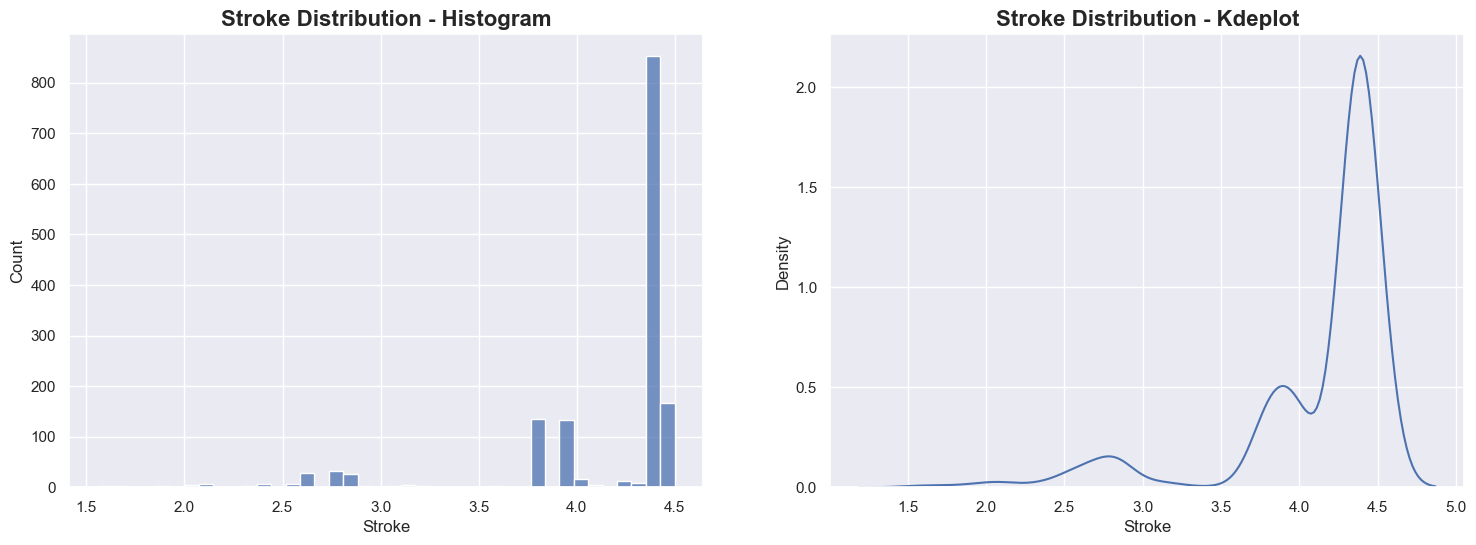

In [121]:
distribution_chart("Stroke")

- Xử lý ngoại lệ

In [122]:
#True danh cho phan bo chuan, False danh cho phan bo Lech
def exception_handling(column, cd, data):
  if cd == True:
    upper_column = data[column].mean() + 3* data[column].std()
    lower_column = data[column].mean() - 3* data[column].std()
    data.loc[data[column] >= round(upper_column), column] = round(upper_column)
    data.loc[data[column] <= round(lower_column), column] = round(lower_column)
  else:
    q1, q3 = np.percentile(data[column], [25, 75])  
    IQR = q3 - q1
    upper_column = q3 + 3 * IQR
    lower_column = q1 - 3 * IQR
    data.loc[data[column] >= upper_column, column] = round(upper_column)
    data.loc[data[column] <= lower_column, column] = round(lower_column)
  return data
  
data = exception_handling("price", True, data)
data = exception_handling("Displacement", False, data)
data = exception_handling("Odometer", False, data)
data = exception_handling("Stroke", False, data) 
data = exception_handling("Year", False, data)
data = exception_handling("Weight", False, data)
data = exception_handling("Engine Torque", False, data)
data = exception_handling("Fuel Capacity", False, data)
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1464 non-null   float64
 1   Displacement   1464 non-null   float64
 2   Odometer       1464 non-null   float64
 3   Stroke         1464 non-null   float64
 4   Year           1464 non-null   float64
 5   Weight         1464 non-null   float64
 6   Engine Torque  1464 non-null   float64
 7   Fuel Capacity  1464 non-null   float64
dtypes: float64(8)
memory usage: 91.6 KB


,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque,Fuel Capacity
count,1464.00000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,12792.56612,1306.447868,20213.593664,4.158845,2012.428962,754.924267,97.418056,5.106764
std,7474.31254,537.507702,18029.646605,0.444250,6.591831,0.706062,17.963383,1.035475
min,472.50000,0.000000,0.000000,2.769000,1978.000000,754.000000,38.000000,1.000000
25%,6999.00000,937.000000,6266.750000,3.962000,2008.000000,754.832604,92.000000,4.700000
50%,11549.47500,1573.152000,18165.500000,4.374000,2014.000000,754.832604,100.000000,5.000000
75%,16999.00000,1689.500000,27655.000000,4.380000,2018.000000,755.000000,110.000000,6.000000
max,35853.00000,3947.000000,91820.000000,4.500000,2022.000000,756.000000,129.000000,10.000000


- Heatmap thể hiện sự tương quan giữa các biến

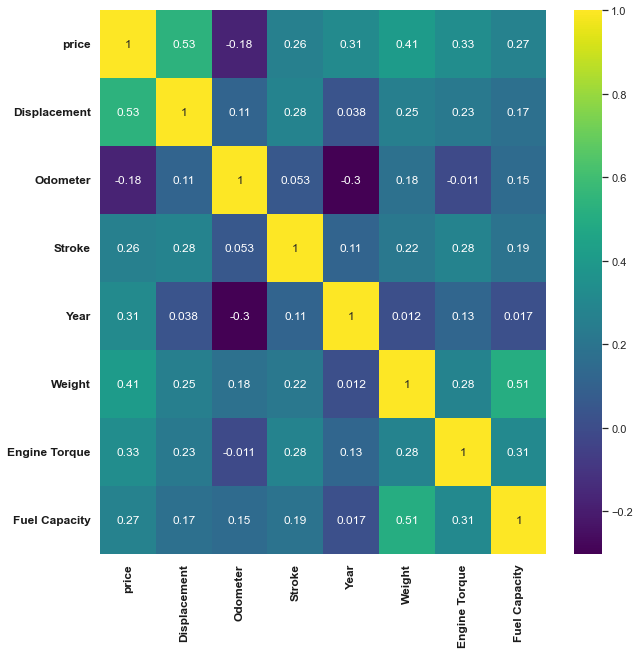

In [123]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

Chuẩn hóa dữ liệu

- Chuẩn hóa MinMax

In [124]:
min_max=MinMaxScaler()
df_minmax =pd.DataFrame(min_max.fit_transform(data),columns
=data.columns)
# df_minmax
df_minmax.info()
df_minmax.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1464 non-null   float64
 1   Displacement   1464 non-null   float64
 2   Odometer       1464 non-null   float64
 3   Stroke         1464 non-null   float64
 4   Year           1464 non-null   float64
 5   Weight         1464 non-null   float64
 6   Engine Torque  1464 non-null   float64
 7   Fuel Capacity  1464 non-null   float64
dtypes: float64(8)
memory usage: 91.6 KB


,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque,Fuel Capacity
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,0.348216,0.330998,0.220144,0.802914,0.782476,0.462133,0.652946,0.456307
std,0.211255,0.136181,0.196359,0.256644,0.149814,0.353031,0.197400,0.115053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.184466,0.237395,0.068250,0.689197,0.681818,0.416302,0.593407,0.411111
50%,0.313081,0.398569,0.197838,0.927210,0.818182,0.416302,0.681319,0.444444
75%,0.467108,0.428047,0.301187,0.930676,0.909091,0.500000,0.791209,0.555556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


    Áp dụng mô hình Linear đa biến để dự đoán

In [125]:
X = df_minmax.drop(["price"], axis=1)
Y = df_minmax["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
compare_df = pd.DataFrame({
    "Target" : Y_test,
    "Prediction" : predictions
})
compare_df.sample(10)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"The RMSE: {rmse:.4f}")
r2 = r2_score(Y_test, predictions)
print(f"The r2 score: {r2 * 100:.2f} %")

The RMSE: 0.1550
The r2 score: 45.47 %


    Áp dụng K-Means

Sử dụng phương pháp chọn K bằng elbow:

- Distortion: Trung bình cộng phương khoảng cách giữa tâm cụm đến các điểm còn lại.
- Chọn K mà khi tăng giá trị của nó thì giá trị Distortion cón xu hướng đi ngang hoặc giảm không đáng kể

In [126]:
k = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_minmax[['price','Displacement','Odometer','Stroke','Year','Weight','Engine Torque','Fuel Capacity']])
    k.append(kmeans.inertia_)

elbow_df = pd.DataFrame(index=range(1,30),data=k).reset_index()
elbow_df = elbow_df.rename(columns={'index':'Number_of_clusters',0:'Sum_of_intra_cluster_squares'})

<AxesSubplot:xlabel='Number_of_clusters', ylabel='Sum_of_intra_cluster_squares'>

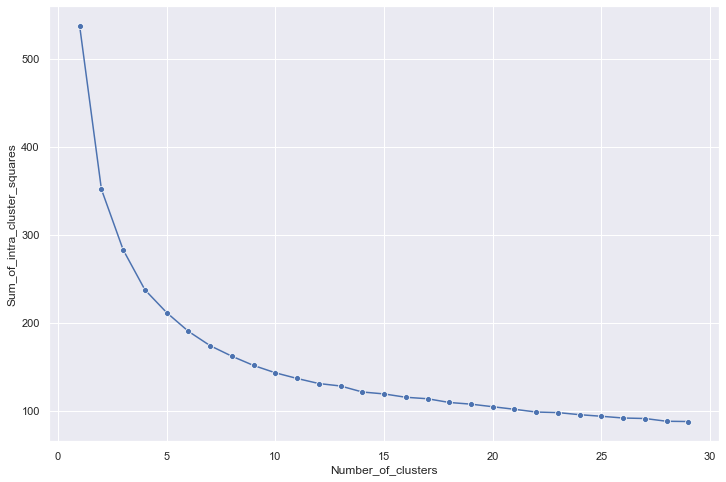

In [127]:
plt.figure(figsize=(12,8))
sns.lineplot(x=elbow_df.Number_of_clusters, y=elbow_df.Sum_of_intra_cluster_squares, marker='o')

=> Chọn k = 20

Thực hiện K-means với k=20

In [128]:
kmeans = MiniBatchKMeans(n_clusters=20,
                          random_state=0,
                          batch_size=10)

y_pred = kmeans.fit_predict(df_minmax[['price','Displacement','Odometer','Stroke','Year','Weight','Engine Torque','Fuel Capacity']])

In [129]:
df_kmeans = df_minmax.copy()
df_kmeans['k_means_clusters'] = pd.Series(y_pred)
df_kmeans

,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque,Fuel Capacity,k_means_clusters
0,0.325674,0.031670,0.000381,0.930676,1.000000,0.416302,0.442066,0.555556,4
1,0.890957,0.473271,0.000054,1.000000,1.000000,1.000000,0.923077,0.555556,6
2,0.947485,0.473271,0.000882,1.000000,1.000000,1.000000,0.879121,0.555556,6
3,0.325674,0.487205,0.014746,1.000000,1.000000,0.000000,0.956044,0.444444,18
4,0.198598,0.063086,0.221711,0.595609,1.000000,0.416302,0.600000,0.071111,8
...,...,...,...,...,...,...,...,...,...
1459,0.031161,0.365355,0.016336,0.930676,0.659091,0.416302,0.442066,0.444444,4
1460,0.135032,0.101343,0.100196,0.930676,0.863636,0.416302,0.628571,0.255556,4
1461,0.004452,0.038004,0.087127,0.689197,0.840909,0.416302,0.956044,0.555556,2
1462,0.117226,0.252850,0.118711,0.711150,0.590909,0.000000,0.600000,0.533333,0


    Áp dụng LinearRegression cho mô hình sau khi đã chia cụm

- Tách cột k_means_clusters

In [130]:
data_temp = df_kmeans.copy()
for i in range(0,20):
  colums = 'k_means_clusters_' + str(i)
  data_temp[colums] = (data_temp['k_means_clusters'] == i)*1
data_temp

,price,Displacement,Odometer,Stroke,Year,Weight,Engine Torque,Fuel Capacity,k_means_clusters,k_means_clusters_0,...,k_means_clusters_10,k_means_clusters_11,k_means_clusters_12,k_means_clusters_13,k_means_clusters_14,k_means_clusters_15,k_means_clusters_16,k_means_clusters_17,k_means_clusters_18,k_means_clusters_19
0,0.325674,0.031670,0.000381,0.930676,1.000000,0.416302,0.442066,0.555556,4,0,...,0,0,0,0,0,0,0,0,0,0
1,0.890957,0.473271,0.000054,1.000000,1.000000,1.000000,0.923077,0.555556,6,0,...,0,0,0,0,0,0,0,0,0,0
2,0.947485,0.473271,0.000882,1.000000,1.000000,1.000000,0.879121,0.555556,6,0,...,0,0,0,0,0,0,0,0,0,0
3,0.325674,0.487205,0.014746,1.000000,1.000000,0.000000,0.956044,0.444444,18,0,...,0,0,0,0,0,0,0,0,1,0
4,0.198598,0.063086,0.221711,0.595609,1.000000,0.416302,0.600000,0.071111,8,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.031161,0.365355,0.016336,0.930676,0.659091,0.416302,0.442066,0.444444,4,0,...,0,0,0,0,0,0,0,0,0,0
1460,0.135032,0.101343,0.100196,0.930676,0.863636,0.416302,0.628571,0.255556,4,0,...,0,0,0,0,0,0,0,0,0,0
1461,0.004452,0.038004,0.087127,0.689197,0.840909,0.416302,0.956044,0.555556,2,0,...,0,0,0,0,0,0,0,0,0,0
1462,0.117226,0.252850,0.118711,0.711150,0.590909,0.000000,0.600000,0.533333,0,1,...,0,0,0,0,0,0,0,0,0,0


Tạo tập dữ liệu Train và Test

In [131]:
X = data_temp.drop(["price","k_means_clusters"], axis=1)
Y = data_temp["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(980, 27)
(484, 27)
(980,)
(484,)


In [132]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

- So sánh kết quả tính toán và kết quả thực tế

In [133]:
predictions = model.predict(X_test)
compare_df = pd.DataFrame({
    "Target" : Y_test,
    "Prediction" : predictions
})
compare_df.sample(10)

,Target,Prediction
1447,0.370967,0.492706
515,0.184353,0.268982
8,0.721372,0.555786
428,0.269145,0.198364
917,0.170080,0.225861
207,0.339665,0.468018
288,0.608428,0.593506
1324,0.685102,0.515747
1013,0.277625,0.179413
976,0.728253,0.621674


- Đánh giá mô hình bằng thông số RMSE và R2

In [134]:
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"The RMSE: {rmse:.4f}")
r2 = r2_score(Y_test, predictions)
print(f"The r2 score: {r2 * 100:.2f} %")

The RMSE: 0.1087
The r2 score: 73.18 %


<AxesSubplot:xlabel='price'>

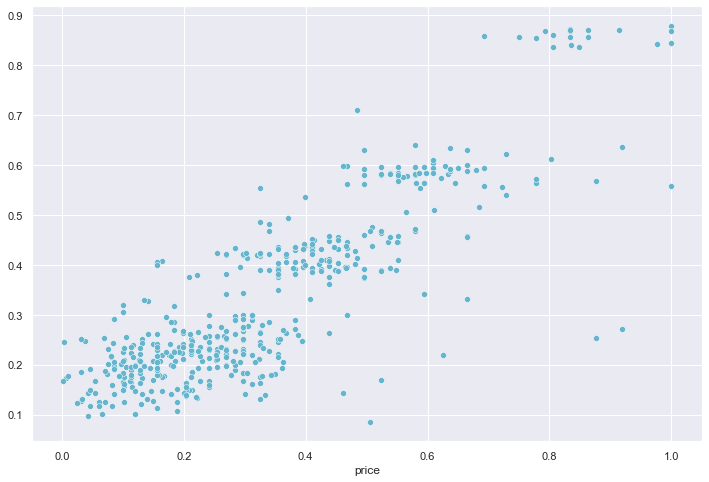

In [135]:
plt.figure(figsize=[12,8])
sns.scatterplot(Y_test, predictions, color='c')